In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('parsedSurveyData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   program                                            344 non-null    object 
 1   residence                                          344 non-null    object 
 2   rating                                             344 non-null    float64
 3   residence_Claudette Millar Hall (CMH)              344 non-null    int64  
 4   residence_Columbia Lake Village South (CLV-South)  344 non-null    int64  
 5   residence_Mackenzie King Village (MKV)             344 non-null    int64  
 6   residence_Ron Eydt Village (REV)                   344 non-null    int64  
 7   residence_UW Place (UWP)                           344 non-null    int64  
 8   residence_Village 1                                344 non-null    int64  
 9   program_AF

In [3]:
outcome = data['rating']
inputVariables = data[data.columns[3:]]

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0, 
stratify=data['rating'])

X_train = train[train.columns[3:]]
y_train = train['rating']

X_test = test[test.columns[3:]]
y_test = test['rating']



In [4]:
from sklearn.linear_model import LogisticRegression 

model_residence = LogisticRegression(multi_class='ovr', solver='liblinear')
model_residence.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [5]:
print('Coefficients of the model for all features:', model_residence.coef_)

Coefficients of the model for all features: [[ 0.121107   -0.01681064  0.81516954 -0.3915224   0.20257933 -0.01628472
  -0.05790395  1.24382272 -0.19915491 -0.32344011 -0.50417998  0.50317023
   0.05192411  0.25721219 -0.47374643 -0.22853738 -0.42530994 -0.19315176]
 [ 0.16089888 -0.03390898  0.65463196 -0.47267241  0.07285963 -0.23608197
  -0.1009496  -0.05572955 -0.43764998  0.24634982  1.41685729 -0.86811217
  -0.0550387  -0.04920764 -0.61136776 -0.02777399  0.16619092 -0.2145034 ]
 [-0.42492298 -0.05277183 -0.49900534  1.25887388 -0.2367855   0.33942956
   0.99808258 -0.66093297 -0.15733438  0.34357046 -0.15355517 -0.30087503
   0.3158623   0.04636385 -0.04510196 -0.47512091  0.17520135 -0.27732487]
 [-0.18058943 -0.01933569 -1.10320836  0.73192963  0.07093711  0.9985193
  -0.24556072  0.61058598  0.16424388 -0.51966833  0.27210585 -0.02702661
   0.24357251 -0.03589237  0.05439057 -0.42699228 -0.02116898 -0.38625409]
 [ 0.06812799 -0.03682784 -0.33516616  0.07475599  0.23563694 -0.

In [6]:
predict = model_residence.predict(X_test)
print(predict)

[ 9.  8.  2. 10.  8.  3.  7.  2.  8.  3.  2.  9.  7.  9.  4.  2.  5.  3.
  8.  9.  9.  7.  9.  3.  3.  9.  9.  3.  9.  3.  8.  8.  9.  9.  2.  8.
  7.  3.  4.  9.  8.  1.  2.  1.  3.  2. 10.  2.  1.  3.  4.  2.  3.  3.
  9.  3.  3.  3.  3.  7.  3.  3.  8. 10.  2.  7. 10.  3. 10.]


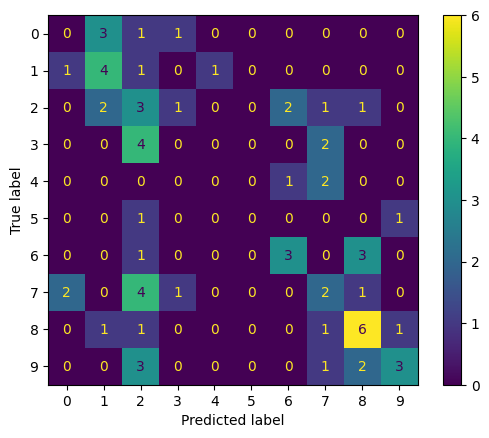

In [7]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_test, predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()


In [8]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.40      0.57      0.47         7
         3.0       0.16      0.30      0.21        10
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       0.50      0.43      0.46         7
         8.0       0.22      0.20      0.21        10
         9.0       0.46      0.60      0.52        10
        10.0       0.60      0.33      0.43         9

    accuracy                           0.30        69
   macro avg       0.23      0.24      0.23        69
weighted avg       0.29      0.30      0.29        69



/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
